In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pysal as ps
import libpysal.api as lp
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

from libpysal import examples

from importlib import reload

## Example Data

First, we will load the Guerry.shp data from `examples` in `libpysal`.

In [2]:
f = lp.open(lp.get_path("sids2.dbf"))

varnames = ['SIDR74',  'SIDR79',  'NWR74',  'NWR79']
vars = [np.array(f.by_col[var]) for var in varnames]

w = lp.open(lp.get_path("sids2.gal")).read()

from esda.moran import Moran_BV_matrix
moran_matrix = Moran_BV_matrix(vars,  w,  varnames = varnames)

In [3]:
len(moran_matrix)
moran_matrix[(0,  1)].varnames
moran_matrix[(0,1)].varnames['x']

'SIDR74'

In [4]:
from splot._viz_esda_mpl import moran_facette
from importlib import reload

reload(splot._viz_esda_mpl)
from splot._viz_esda_mpl import moran_facette

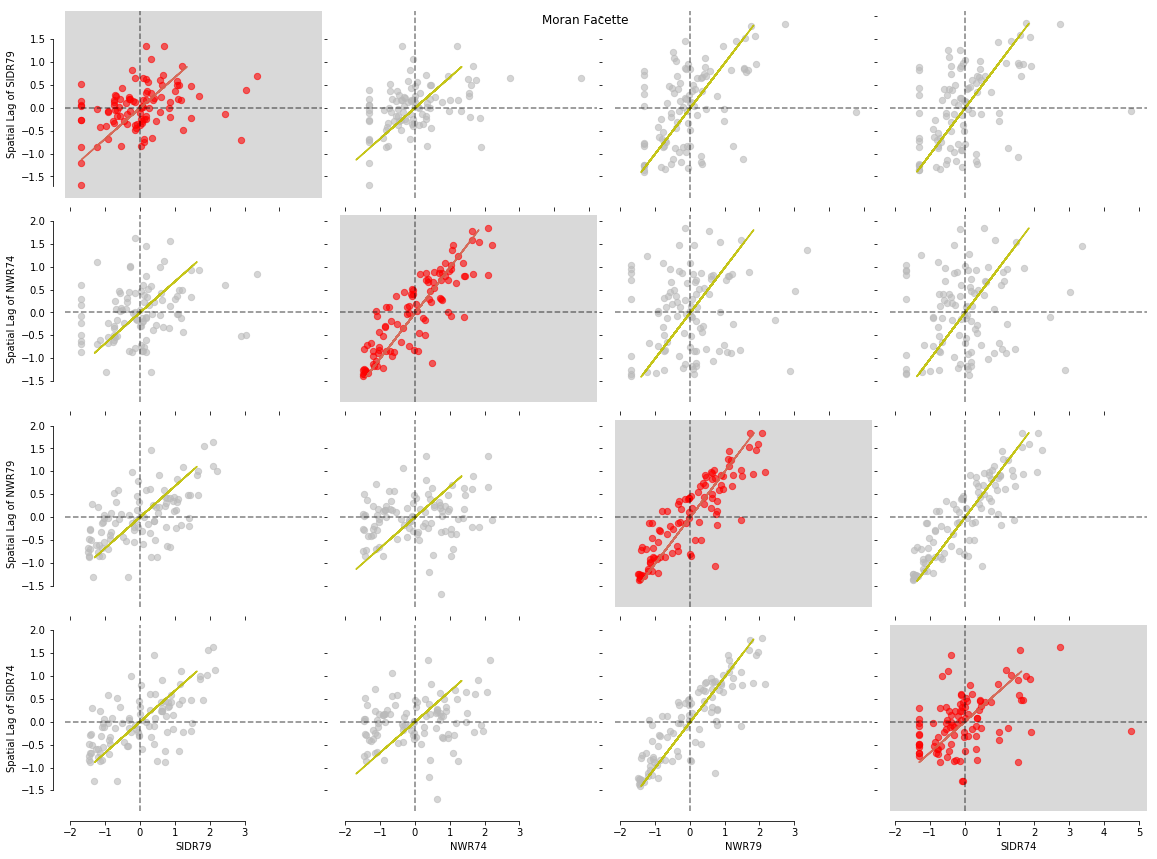

In [5]:
fig, axarr = moran_facette(moran_matrix, scatter_glob_kwds=dict(color='r'),
                           fitline_bv_kwds=dict(color='y'))
plt.show()

### Moran_Tests

In [6]:
import geopandas
from shapely.geometry import Polygon
import random
import matplotlib

In [7]:
link_to_data = examples.get_path('Guerry.shp')
gdf = gpd.read_file(link_to_data)

In [8]:
y = gdf['Donatns'].values
x = gdf['Suicids'].values
w = lp.Queen.from_dataframe(gdf)
w.transform = 'r'

In [9]:
from splot.esda import moran_scatterplot
from esda.moran import (Moran, Moran_BV, Moran_Local,
                        Moran_Local_BV)

In [10]:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

/Users/steffie/code/splot/splot/_viz_esda_mpl.py:126: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  warnings.warn('`p` is only used for plotting `esda.moran.Moran_Local`\n'
/Users/steffie/code/splot/splot/_viz_esda_mpl.py:133: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  warnings.warn('`p` is only used for plotting `esda.moran.Moran_Local`\n'


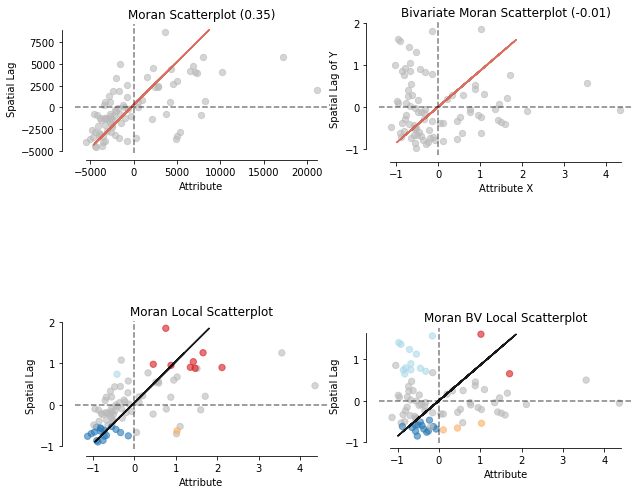

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, p=0.05, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, p=0.05, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()

### VBA

In [16]:
from splot.mapping import vba_choropleth
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from matplotlib import colors
import collections
import matplotlib.cm as cm

In [17]:
def value_by_alpha_cmap(x, y, cmap='GnBu'):
    """
    Calculates Value by Alpha rgba values
    
    Parameters
    ----------
    x : array
        Variable determined by color
    y : array
        Variable determining alpha value
    cmap : str or list of str
        Matplotlib Colormap or list of colors used
        to create vba_layer
    
    Returns
    -------
    rgba : ndarray (n,4)
        RGBA colormap, where the alpha channel represents one
        attribute (x) and the rgb color the other attribute (y)
    """
    # option for cmap or colorlist input
    if isinstance(cmap, collections.Sequence):
        cmap = colors.LinearSegmentedColormap.from_list('newmap', cmap)
    cmap = cm.get_cmap(cmap)
    rgba = cmap(x)
    rgba[:, 3] = y/y.max()
    return rgba

In [18]:
rgba= value_by_alpha_cmap(x,y)
gdf.plot(color=rgba)

ValueError: Invalid RGBA argument: 'n'

ValueError: Invalid RGBA argument: 'n'

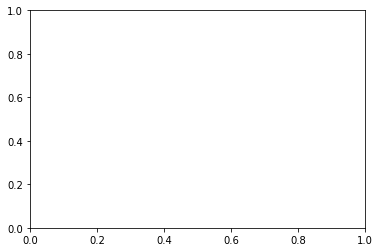

In [13]:
vba_choropleth(x, y, gdf)